In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

np.random.seed(123)
tf.random.set_seed(123)

In [55]:
df=pd.read_csv('./INFY.csv',index_col='Date',parse_dates=True)

In [56]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


In [57]:
df['Date']=df.index

In [58]:
start_date='2016-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [59]:
df=df.loc[mask]

In [60]:
df=df.drop(columns=['Series','Symbol','Open','High','Low','Last','Close','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','Date'])

In [61]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [62]:
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [63]:
df['Diff Prev Close']=df['Prev Close'].diff()

In [64]:
series=df['Diff Prev Close'].dropna().to_numpy()

T=50
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (1187, 50) Y.shape (1187,)


In [65]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

LSTM+CNN

In [66]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Conv1D(25,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(50,3,activation='relu')(x)
x=GlobalMaxPool1D()(x)
x=Dense(1)(x)
model_lstm_cnn=Model(i,x)
model_lstm_cnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 25)            100       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 25)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 50)            3800      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 1)                 51  

In [67]:
check_point_lstm_cnn=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [68]:
model_lstm_cnn.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [69]:
r=model_lstm_cnn.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_cnn]
)

Epoch 1/100
26/26 [==============================] - 1s 15ms/step - loss: 844.5764 - mae: 11.8897 - mse: 844.5764 - val_loss: 334.3073 - val_mae: 12.4022 - val_mse: 334.3073
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 811.5859 - mae: 11.4673 - mse: 811.5859 - val_loss: 333.1085 - val_mae: 12.3499 - val_mse: 333.1085
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 807.7812 - mae: 11.3835 - mse: 807.7812 - val_loss: 335.3872 - val_mae: 12.4130 - val_mse: 335.3872
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 804.9677 - mae: 11.3642 - mse: 804.9677 - val_loss: 335.2559 - val_mae: 12.4010 - val_mse: 335.2559
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 802.0715 - mae: 11.3020 - mse: 802.0715 - val_loss: 335.8058 - val_mae: 12.4250 - val_mse: 335.8058
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 801.0995 - mae: 11.3433 - mse: 801.0995 - val_loss: 336.5551 

LSTM+GRU

In [70]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=GRU(200,return_sequences=True)(x)
x=GRU(200,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Dense(1)(x)
model_lstm_gru=Model(i,x)
model_lstm_gru.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 50, 200)           161600    
                                                                 
 lstm_9 (LSTM)               (None, 50, 200)           320800    
                                                                 
 dense_16 (Dense)            (None, 50, 100)           20100     
                                                                 
 dense_17 (Dense)            (None, 50, 50)            5050      
                                                                 
 gru_4 (GRU)                 (None, 50, 200)           151200    
                                                                 
 gru_5 (GRU)                 (None, 50, 200)           2412

In [71]:
check_point_lstm_gru=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [72]:
model_lstm_gru.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [73]:
r=model_lstm_gru.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_gru]
)

Epoch 1/100
26/26 [==============================] - 24s 614ms/step - loss: 799.4514 - mae: 11.1590 - mse: 799.4514 - val_loss: 332.1073 - val_mae: 12.2564 - val_mse: 332.1073
Epoch 2/100
26/26 [==============================] - 14s 551ms/step - loss: 799.3150 - mae: 11.1712 - mse: 799.3150 - val_loss: 332.5235 - val_mae: 12.2628 - val_mse: 332.5235
Epoch 3/100
26/26 [==============================] - 14s 548ms/step - loss: 798.3296 - mae: 11.1527 - mse: 798.3296 - val_loss: 332.6658 - val_mae: 12.2611 - val_mse: 332.6658
Epoch 4/100
26/26 [==============================] - 14s 549ms/step - loss: 798.2589 - mae: 11.1439 - mse: 798.2589 - val_loss: 333.8315 - val_mae: 12.2928 - val_mse: 333.8315
Epoch 5/100
26/26 [==============================] - 14s 547ms/step - loss: 797.8931 - mae: 11.1409 - mse: 797.8931 - val_loss: 332.8279 - val_mae: 12.2619 - val_mse: 332.8279
Epoch 6/100
26/26 [==============================] - 14s 545ms/step - loss: 797.9725 - mae: 11.1910 - mse: 797.9725 - va

Predictions



In [74]:
train_idx[:T+1]=False

In [75]:
Ptrain_lstm_cnn=model_lstm_cnn.predict(Xtrain).flatten()
Ptest_lstm_cnn=model_lstm_cnn.predict(Xtest).flatten()

In [76]:
Ptrain_lstm_gru=model_lstm_gru.predict(Xtrain).flatten()
Ptest_lstm_gru=model_lstm_gru.predict(Xtest).flatten()

In [77]:
df.loc[train_idx,'Diff LSTM+CNN train prediction']=Ptrain_lstm_cnn
df.loc[test_idx,'Diff LSTM+CNN test prediction']=Ptest_lstm_cnn

In [78]:
df.loc[train_idx,'Diff LSTM+GRU train prediction']=Ptrain_lstm_gru
df.loc[test_idx,'Diff LSTM+GRU test prediction']=Ptest_lstm_gru

In [79]:
df['Shift Prev Close']=df['Prev Close'].shift(1)
prev=df['Shift Prev Close']

In [80]:
last_train=train.iloc[-1]['Prev Close']

In [81]:
df.loc[train_idx,'train_LSTM_CNN']=prev[train_idx]+Ptrain_lstm_cnn
df.loc[test_idx,'Prediction_LSTM_CNN']=prev[test_idx]+Ptest_lstm_cnn

In [82]:
df.loc[train_idx,'train_LSTM_GRU']=prev[train_idx]+Ptrain_lstm_gru
df.loc[test_idx,'Prediction_LSTM_GRU']=prev[test_idx]+Ptest_lstm_gru

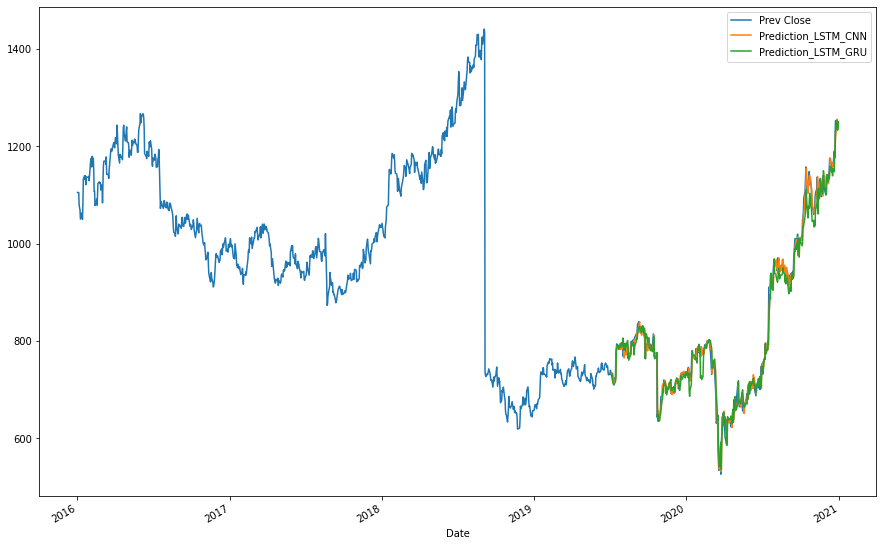

In [83]:
df[['Prev Close' ,'Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

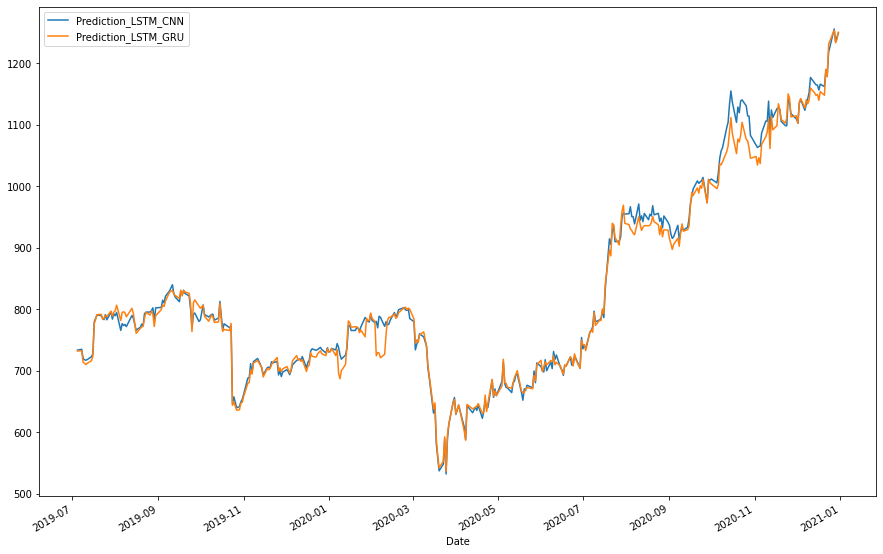

In [84]:
df[['Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

In [85]:
pred_lstm_cnn=df['Prediction_LSTM_CNN']
pred_lstm_cnn.dropna(inplace=True)

In [86]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

18.44168190841707


In [87]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_cnn)
print(error)

12.553676348737868


In [88]:
r2_score(test['Prev Close'],pred_lstm_cnn)

0.9876101205144849

In [89]:
pred_lstm_gru=df['Prediction_LSTM_GRU']
pred_lstm_gru.dropna(inplace=True)

In [90]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

18.44168190841707


In [91]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_gru)
print(error)

17.274777906777643


In [92]:
r2_score(test['Prev Close'],pred_lstm_gru)

0.9788532773415018